# Individual Household Electric Power Consumption

In this notebook I present an exploratory data analysis on the Individual Household Electric Power Consumption data set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import mode

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

In [2]:
dataset = pd.read_csv('household_power_consumption.txt', sep = ';', 
                      parse_dates = {'dt' : ['Date', 'Time']}, infer_datetime_format = True, 
                      low_memory = False, na_values = ['nan','?'], index_col = 'dt')

I start by taking a first look at the dataset. 

In [3]:
dataset.shape

(2075259, 7)

In [4]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Now let's take a look at the descriptive statistics for this dataset.

In [5]:
stats = dataset.describe().T
for i in range(len(dataset.columns)):
    stats.loc[dataset.columns[i], 'mode'], stats.loc[dataset.columns[i], 'mode_count'] = mode(dataset[dataset.columns[i]])
    stats.loc[dataset.columns[i], 'unique_values'] = dataset[dataset.columns[i]].value_counts().size
    stats.loc[dataset.columns[i], 'Null'] = dataset[dataset.columns[i]].isnull().sum()
    if np.isnan(stats.loc[dataset.columns[i], 'count']): 
        stats.loc[dataset.columns[i], 'count'] = dataset.shape[0] - stats.loc[dataset.columns[i], 'Null']
stats = stats[['count', 'Null', 'unique_values', 'mode', 'mode_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
stats.index.name = 'variable'
stats.reset_index(inplace = True)
stats

,variable,count,Null,unique_values,mode,mode_count,mean,std,min,25%,50%,75%,max
0,Global_active_power,2049280.0,25979.0,4186.0,0.218,9565.0,1.091615,1.057294,0.076,0.308,0.602,1.528,11.122
1,Global_reactive_power,2049280.0,25979.0,532.0,0.000,481561.0,0.123714,0.112722,0.000,0.048,0.100,0.194,1.390
2,Voltage,2049280.0,25979.0,2837.0,241.180,3559.0,240.839858,3.239987,223.200,238.990,241.010,242.890,254.150
3,Global_intensity,2049280.0,25979.0,221.0,1.000,172785.0,4.627759,4.444396,0.200,1.400,2.600,6.400,48.400
4,Sub_metering_1,2049280.0,25979.0,88.0,0.000,1880175.0,1.121923,6.153031,0.000,0.000,0.000,0.000,88.000
5,Sub_metering_2,2049280.0,25979.0,81.0,0.000,1436830.0,1.298520,5.822026,0.000,0.000,0.000,1.000,80.000
6,Sub_metering_3,2049280.0,25979.0,32.0,0.000,852092.0,6.458447,8.437154,0.000,0.000,1.000,17.000,31.000


The number of null values suggests us that the rows with a null value in one variable are likely to have null values in the remaining variables also. We can check this by performing a simple subset in the dataset:

In [6]:
dataset.loc[dataset["Global_active_power"].isnull()].sum()

Global_active_power      0.0
Global_reactive_power    0.0
Voltage                  0.0
Global_intensity         0.0
Sub_metering_1           0.0
Sub_metering_2           0.0
Sub_metering_3           0.0
dtype: float64

We can see that by subsetting the dataset with the nul rows at the variable _Global_active_power_ we end up with an empty dataset. So we can conclude that all the rows with null values at one variable have null values at the others variables also.

Initially I intended to interpolate the missing values in the dataset using the method _dataset.interpolate(method = "time")_. However, since the missing values are common to all the variables at the same time and since they are just a small fraction of my data (less than 1.3\% of my data), I chose to drop the rows with missing values. This way I won't have any assumption regarding the interpolation biasing the correlation between variables.

In [7]:
dataset.dropna(inplace = True, axis = 0)

Now, let's take a look at how each variable behaves in a daily basis. I'll group the variables by their daily mean.

Text(0.5, 1.0, 'Sub_metering_3')

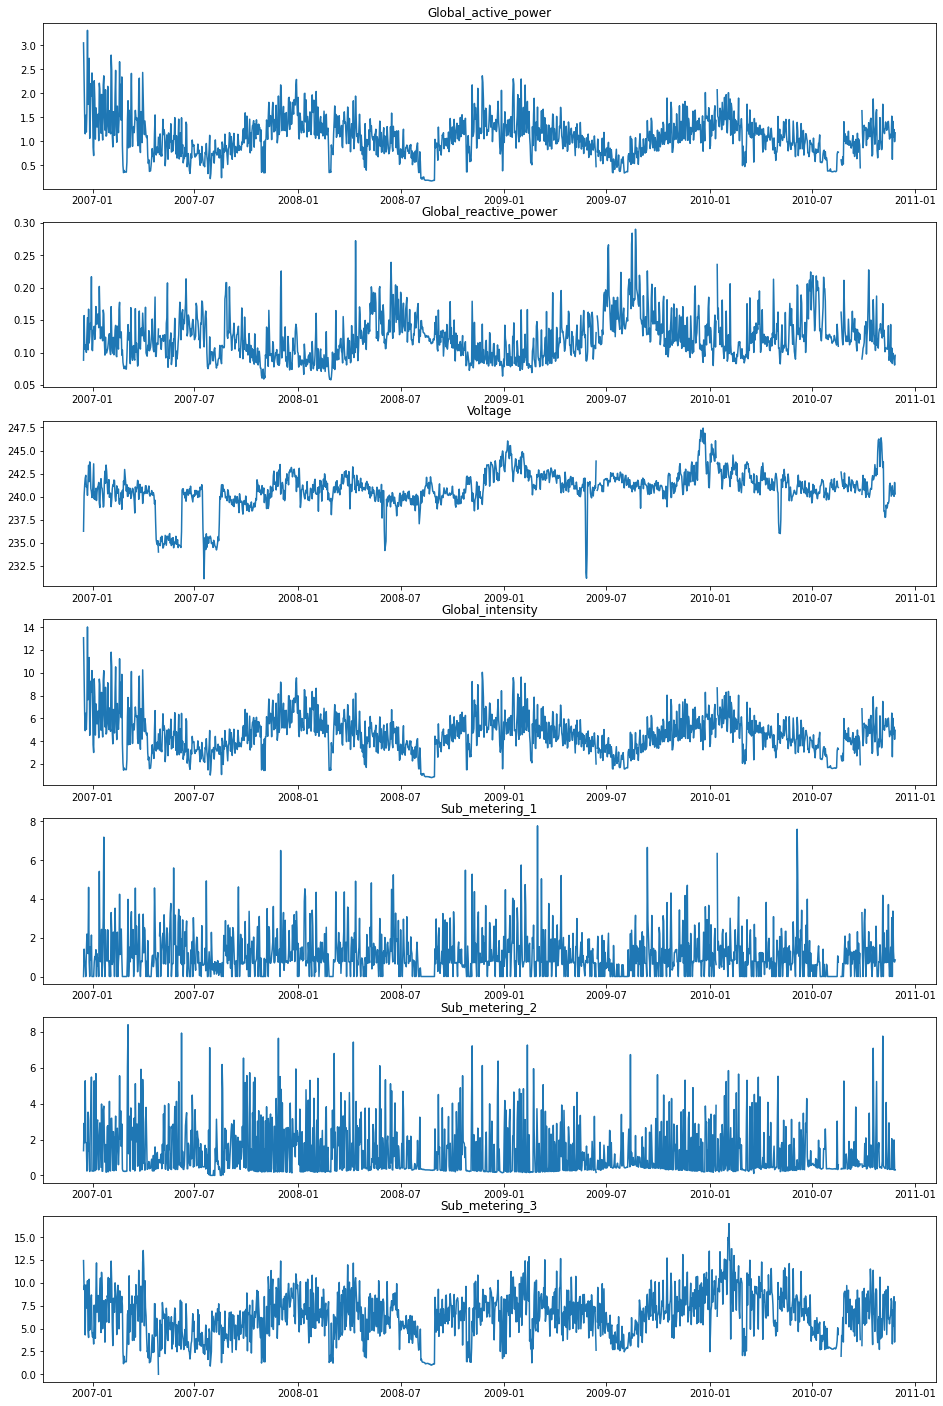

In [8]:
plt.subplots(7,1,figsize=(16,25))

plt.subplot(7, 1, 1)
plt.plot(dataset.Global_active_power.resample('D').mean())
plt.title('Global_active_power')

plt.subplot(7, 1, 2)
plt.plot(dataset.Global_reactive_power.resample('D').mean())
plt.title('Global_reactive_power')

plt.subplot(7, 1, 3)
plt.plot(dataset.Voltage.resample('D').mean())
plt.title('Voltage')

plt.subplot(7, 1, 4)
plt.plot(dataset.Global_intensity.resample('D').mean())
plt.title('Global_intensity')

plt.subplot(7, 1, 5)
plt.plot(dataset.Sub_metering_1.resample('D').mean())
plt.title('Sub_metering_1')

plt.subplot(7, 1, 6)
plt.plot(dataset.Sub_metering_2.resample('D').mean())
plt.title('Sub_metering_2')

plt.subplot(7, 1, 7)
plt.plot(dataset.Sub_metering_3.resample('D').mean())
plt.title('Sub_metering_3')

We can see that the variable *Global_active_power* and *Global_intensity* seem to present a pattern: they tend to reach their lowest values around august and their highest values around february. It makes sense assuming this power consumption reflects the energy consumption of a country that will be in the winter around february and in the summer around august.  
The *Global_active_power* variable presents the opposite trend to the one previously described.  
The remaining variables are very noisy and difficult to observe some type of signal looking at them in this frequency.

So let's decrease the frequency of the data and look at it in monthly intervals.

Text(0.5, 1.0, 'Sub_metering_3')

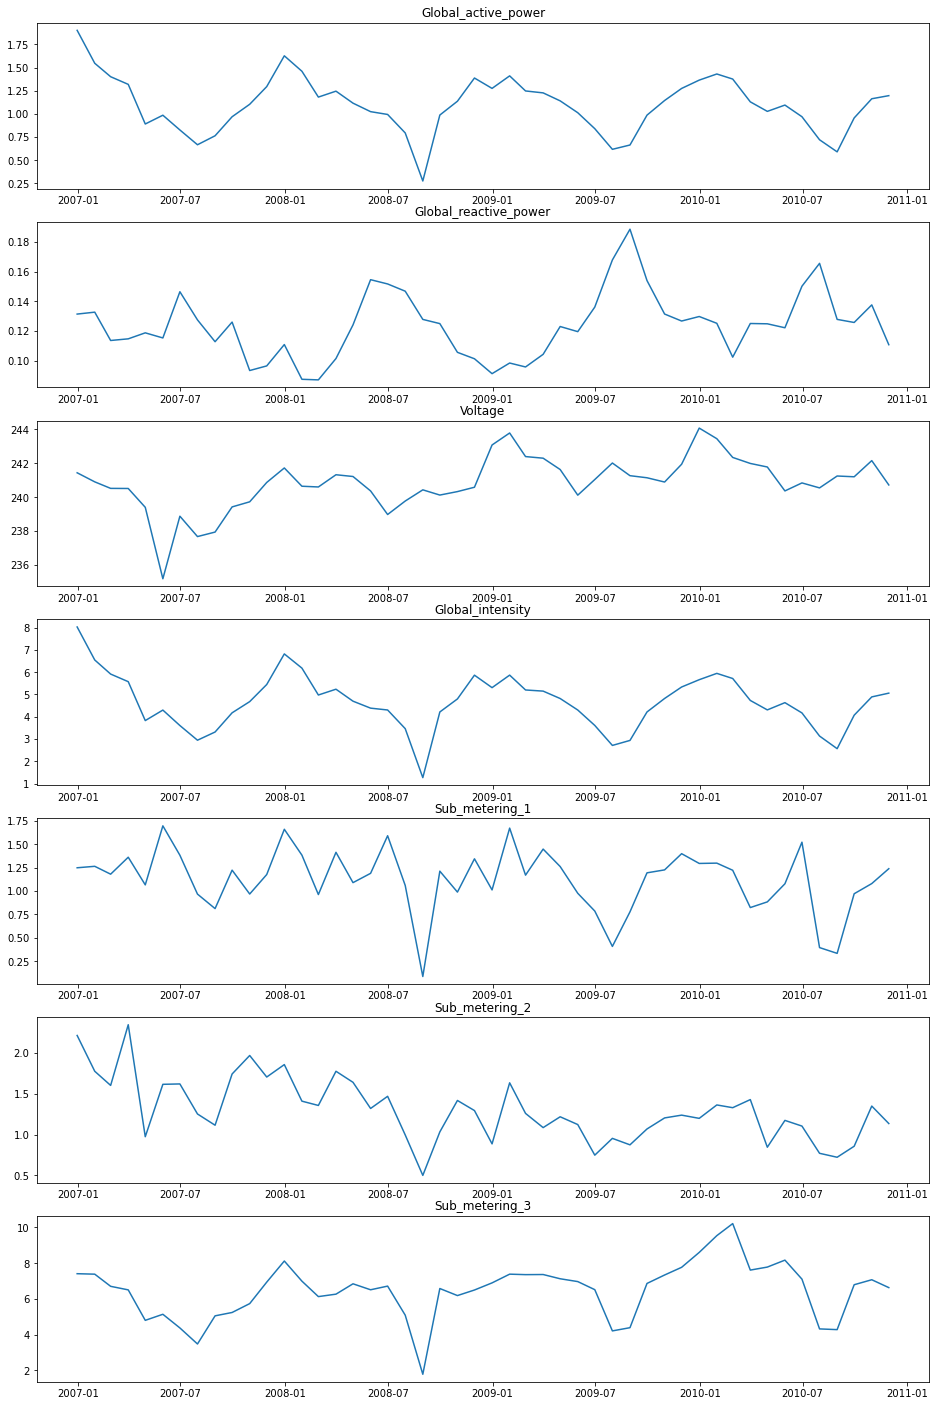

In [9]:
plt.subplots(7,1,figsize=(16,25))

plt.subplot(7, 1, 1)
plt.plot(dataset.Global_active_power.resample('M').mean())
plt.title('Global_active_power')

plt.subplot(7, 1, 2)
plt.plot(dataset.Global_reactive_power.resample('M').mean())
plt.title('Global_reactive_power')

plt.subplot(7, 1, 3)
plt.plot(dataset.Voltage.resample('M').mean())
plt.title('Voltage')

plt.subplot(7, 1, 4)
plt.plot(dataset.Global_intensity.resample('M').mean())
plt.title('Global_intensity')

plt.subplot(7, 1, 5)
plt.plot(dataset.Sub_metering_1.resample('M').mean())
plt.title('Sub_metering_1')

plt.subplot(7, 1, 6)
plt.plot(dataset.Sub_metering_2.resample('M').mean())
plt.title('Sub_metering_2')

plt.subplot(7, 1, 7)
plt.plot(dataset.Sub_metering_3.resample('M').mean())
plt.title('Sub_metering_3')


By averaging the variables in a monthly basis we can see clearer patterns. One thing that we can add to our previous observations is that now we can see that the *Sub_metering* variables also tend to reach their lowest values near august.

Since we have seen how the variables behave isolated from each other, the next step would be to see how they behave in relation to one another. Since different frequencies may shows us different relations, let's look now at the correlation matrix of this dataset with the variables averaged by hour, day, week and month.

Text(0.5, 1.0, 'Monthly resampling')

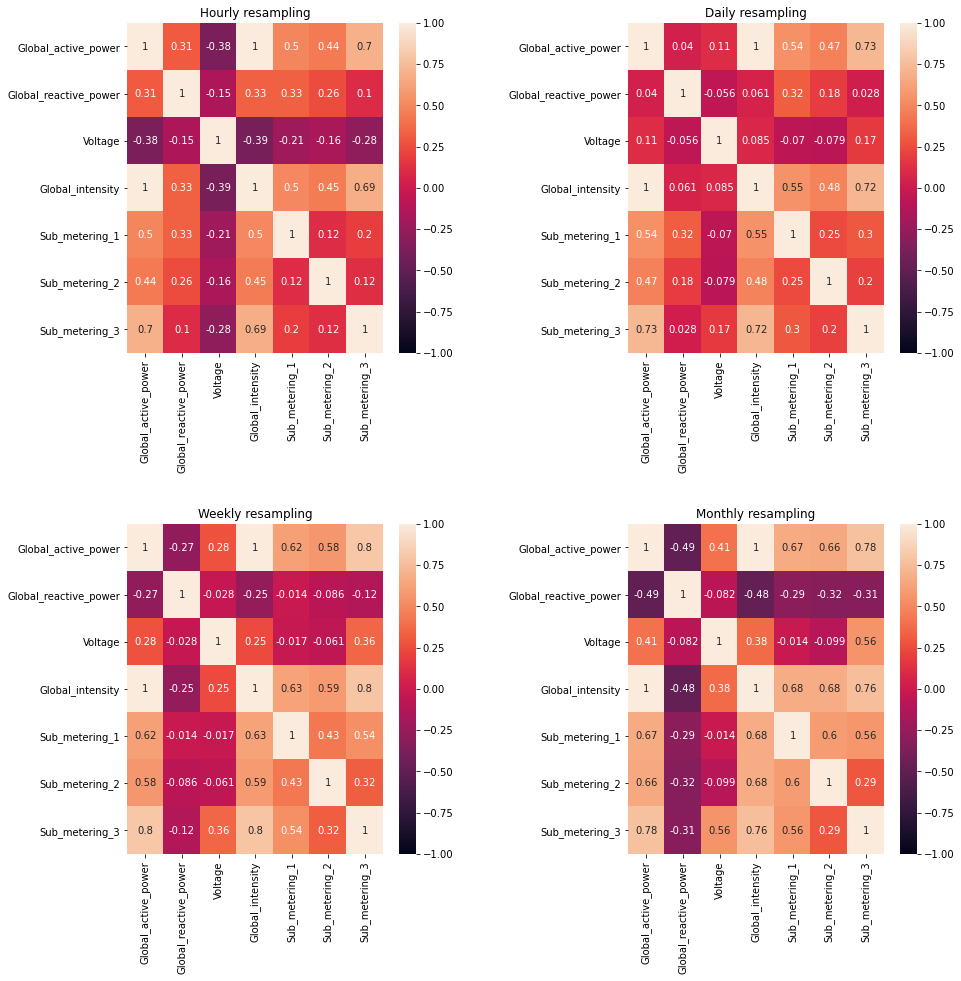

In [10]:
plt.subplots(2,2,figsize=(16,16))
plt.tight_layout(pad = 15.0)

plt.subplot(2, 2, 1)
sns.heatmap(dataset.resample('H').mean().corr(), vmin=-1, vmax=1, annot=True)
plt.title('Hourly resampling', size=12)

plt.subplot(2, 2, 2)
sns.heatmap(dataset.resample('D').mean().corr(), vmin=-1, vmax=1, annot=True)
plt.title('Daily resampling', size=12)

plt.subplot(2, 2, 3)
sns.heatmap(dataset.resample('W').mean().corr(), vmin=-1, vmax=1, annot=True)
plt.title('Weekly resampling', size=12)

plt.subplot(2, 2, 4)
sns.heatmap(dataset.resample('M').mean().corr(), vmin=-1, vmax=1, annot=True)
plt.title('Monthly resampling', size=12)


Things that we can notice:

- *Global_intensity* is perfectly correlated to *Global_active_power*, so one variable should not be used to predict the other;
- The relation among variables may change if we are looking at the data at different time intervals. e.g. *Global_active_power* and *Global_reactive_power* present positive correlation when we look at them in an hourly period, but present negative correlation if we look at them aggregated in a monthly basis;
- As a consequence of the previous observation, the best variables used to predict the eletric power consumption may change according to the unit of time adopted.